In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv("text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
# Define emotion categories
emotion_categories = ['anger', 'joy', 'sadness', 'fear', 'love', 'surprise']

# shingling function
def Shingle(df):
    shingles = []
    for i in range(len(df)):
        shingle = set()
        words = df[i].split()
        for word in words:
            if word.lower() not in stop_words:
                shingle.add(word.lower())  # Convert to lowercase
        shingles.append(shingle)
    return shingles

    #seperate into input list output list.
    #Convert input list into shingles
    #each tweet will have set of shingles input output have same length
    #output as ints
    #vectors of 0s and 1s into neural network

In [5]:
    list_of_tweets = df['text']
    shingles = Shingle(list_of_tweets)

    #print(len(shingles))
    #  [ {'bob','has'}, {'next','tweet','here}]
    #make dict
    #vectors of 0s and 1s that match with certain words in dict aka another python list of 1s and 0s

    def create_dict(shingles):
      ret = []
      for i in range(len(shingles)):
        dict = set()
        for word in shingles[i]:
          dict.add(word)
        ret.append(dict)
        if i > 2000:
          break
      return ret

    dict = create_dict(shingles)

In [6]:
print(dict)

[{'heavy', 'really', 'helpless', 'hearted', 'feel'}, {'bit', 'relax', 'find', 'slouch', 'good', 'listless', 'uni', 'lately', 'around', 'really', 'started', 'ive', 'able', 'expo', 'last', 'weeks', 'end', 'unwind', 'needed', 'enjoyed', 'feeling', 'thing', 'frankly', 'never'}, {'feeling', 'internship', 'gave', 'dmrg', 'distraught'}, {'dont', 'lost', 'feel', 'know'}, {'job', 'teacher', 'suffered', 'kindergarten', 'want', 'anxiety', 'work', 'entrance', 'weeks', 'thoroughly', 'alternative', 'university', 'exam', 'weary', 'taken', 'studies', 'carry'}, {'beginning', 'disheartened', 'feel', 'quite'}, {'must', 'whomever', 'like', 'think', 'enough', 'stay', 'lucky', 'earth', 'place', 'would', 'romantic', 'feel', 'suite'}, {'fear', 'least', 'christmas', 'feel', 'remember', 'way', 'delicious', 'excitement', 'ever', 'eve'}, {'weird', 'im', 'forever', 'taking', 'lie', 'feel', 'time'}, {'deprived', 'feeling', 'without', 'lose', 'still', 'weight'}, {'face', 'pen', 'fit', 'little', 'phone', 'get', 'wind

In [7]:
global_dict = set()
for words in dict:
  global_dict = global_dict.union(words)
print(len(global_dict))
global_dict = sorted(list(global_dict))
print(global_dict)


vectors = []
for tweet in dict:
  v = [0] * len(global_dict)
  for word in tweet:
    ndx = global_dict.index(word)
    v[ndx] = 1
  vectors.append(v)

#vectors = shingle_to_vector(shingles, dict)
print(dict)
print(vectors[2])

4594
['aaron', 'abandon', 'abandoned', 'abandonment', 'abilities', 'ability', 'abit', 'able', 'abnormal', 'abnormally', 'abotu', 'absent', 'absolute', 'absolutely', 'abused', 'academic', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accident', 'accidentally', 'acclimated', 'accommodating', 'accompanied', 'accomplished', 'accomplishing', 'according', 'accordingly', 'accounting', 'accumulate', 'accustomed', 'ache', 'ached', 'achieve', 'achieved', 'aching', 'acquainta', 'acquainted', 'across', 'act', 'action', 'actions', 'active', 'activities', 'activity', 'actual', 'actually', 'ad', 'ada', 'adamantly', 'adaptation', 'add', 'added', 'addicted', 'addictive', 'addition', 'address', 'addresses', 'addy', 'adequately', 'adjust', 'administration', 'administrators', 'admired', 'admissions', 'admit', 'admits', 'admitted', 'admitting', 'adulthood', 'adults', 'advance', 'advantage', 'advent', 'adventures', 'adventurous', 'affect', 'affectionate', 'affects', 'afford', 'afraid', 'af

In [8]:
output_as_ints = df['label'].tolist()
output_as_ints = output_as_ints[:2002]
print(output_as_ints)

[4, 0, 4, 0, 4, 0, 2, 1, 5, 0, 1, 0, 1, 3, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0, 0, 0, 1, 1, 3, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 3, 4, 1, 2, 0, 1, 0, 0, 4, 4, 3, 1, 2, 0, 1, 4, 1, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 4, 3, 0, 3, 0, 1, 1, 4, 4, 0, 3, 1, 1, 0, 3, 0, 1, 1, 1, 2, 2, 5, 4, 0, 3, 4, 1, 1, 0, 1, 0, 0, 1, 0, 4, 4, 1, 0, 3, 1, 2, 1, 1, 0, 1, 4, 1, 2, 5, 0, 4, 0, 1, 4, 1, 1, 0, 0, 4, 0, 0, 0, 1, 1, 3, 3, 4, 1, 3, 1, 4, 1, 0, 1, 1, 0, 1, 1, 0, 0, 3, 4, 0, 0, 0, 5, 2, 0, 0, 5, 4, 3, 0, 1, 1, 3, 0, 2, 2, 2, 0, 0, 1, 0, 3, 1, 1, 3, 3, 1, 1, 1, 4, 1, 1, 1, 1, 4, 5, 3, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 0, 0, 3, 1, 1, 3, 1, 2, 3, 1, 2, 1, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 1, 1, 1, 0, 5, 3, 0, 1, 3, 1, 3, 3, 1, 4, 0, 1, 3, 0, 3, 0, 1, 4, 3, 1, 1, 1, 3, 0, 3, 2, 4, 0, 0, 1, 0, 0, 1, 0, 2, 5, 1, 0, 0, 3, 0, 4, 0, 0, 0, 2, 1, 0, 4, 4, 0, 1, 1, 0, 3, 4, 1, 0, 0, 1, 3, 4, 1, 0, 1, 1, 0, 0, 0, 0, 1, 3, 3, 1, 3, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 1, 1, 3, 3, 1, 2, 2, 0, 3, 4, 0, 0, 1, 1, 4, 

In [9]:
vectorsNP = np.array(vectors)
output_as_intsNP = np.array(output_as_ints)

In [10]:
train_data = vectorsNP
train_labels = output_as_intsNP

test_data = vectors
test_labels = output_as_ints
print(train_labels)

[4 0 4 ... 1 0 1]


In [11]:
model = keras.Sequential()
model.add(layers.Dense(4594, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(6, activation='softmax'))

In [12]:
model.compile(
    #optimizer=tf.optimizers.Adam(learning_rate=0.05),
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
%%time
history = model.fit(
    train_data,
    train_labels,
    epochs=15,
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/15
51/51 [==============================] - 34s 656ms/step - loss: 11.0780 - accuracy: 0.3841 - val_loss: 3.4199 - val_accuracy: 0.4688
Epoch 2/15
51/51 [==============================] - 32s 633ms/step - loss: 2.6444 - accuracy: 0.5309 - val_loss: 2.3284 - val_accuracy: 0.5636
Epoch 3/15
51/51 [==============================] - 29s 576ms/step - loss: 2.0477 - accuracy: 0.5971 - val_loss: 2.1781 - val_accuracy: 0.5262
Epoch 4/15
51/51 [==============================] - 31s 615ms/step - loss: 1.7329 - accuracy: 0.6727 - val_loss: 1.9837 - val_accuracy: 0.5885
Epoch 5/15
51/51 [==============================] - 31s 614ms/step - loss: 1.7059 - accuracy: 0.7127 - val_loss: 2.1359 - val_accuracy: 0.6160
Epoch 6/15
51/51 [==============================] - 31s 614ms/step - loss: 1.5336 - accuracy: 0.7670 - val_loss: 2.0876 - val_accuracy: 0.5935
Epoch 7/15
51/51 [==============================] - 32s 629ms/step - loss: 1.6657 - accuracy: 0.7564 - val_loss: 2.0734 - val_accuracy: 0.608

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

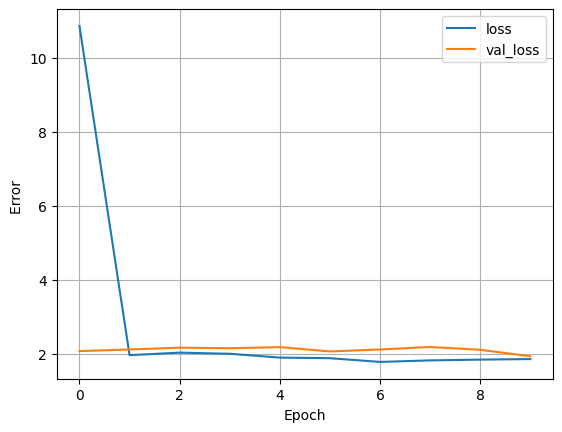

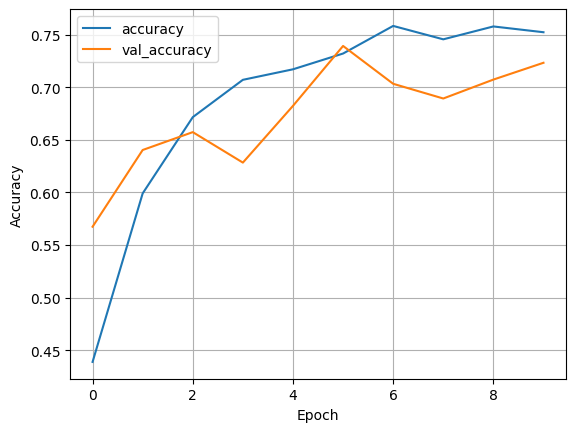

In [ ]:
plot_loss(history)
plt.show()
plot_accuracy(history)

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_data, test_labels, batch_size=1024)
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 16s 2s/step - loss: 1.6755 - accuracy: 0.8143
test loss, test acc: [1.6755479574203491, 0.8142743110656738]
